 1. Определить два вектора, представляющие собой число автомобилей, 
припаркованных в течении 5 рабочих дней у бизнес-центра на уличной 
стоянке и в подземном гараже.
День        Улица Гараж 
Понедельник 80      100 
Вторник     98      82 
Среда       75      105 
Четверг     91      89 
Пятница     78      102

In [2]:
street = [80, 98, 75, 91, 78]
garage = [100, 82, 105, 89, 102]

print("Улица:", street)
print("Гараж:", garage)


Улица: [80, 98, 75, 91, 78]
Гараж: [100, 82, 105, 89, 102]


1.1 Найти и интерпретировать корреляцию между переменными 
«Улица» и «Гараж» (подсчитать корреляцию по Пирсону).

In [3]:
import numpy as np
from scipy.stats import pearsonr

correlation, p_value = pearsonr(street, garage)

print(f"Коэффициент корреляции: {correlation}")
print(f"P-значение: {p_value}")

Коэффициент корреляции: -0.9999999999999998
P-значение: 3.971862410081696e-24


Коэффициент корреляции равен -0.9999999999999998, что означает сильную отрицательную корреляцию.

1.2 Построить диаграмму рассеяния для вышеупомянутых переменных.

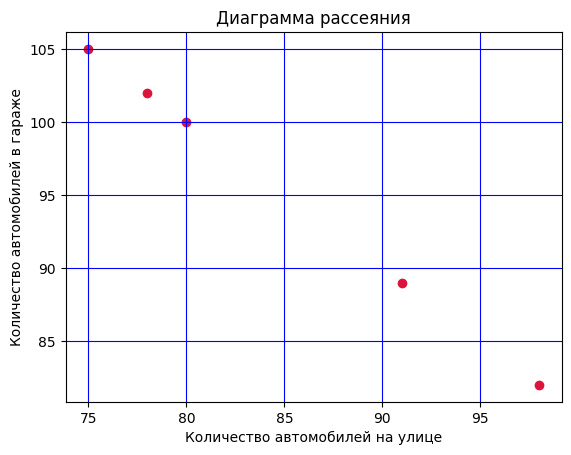

In [18]:
import matplotlib.pyplot as plt

plt.scatter(street, garage, color='crimson')
plt.title('Диаграмма рассеяния')
plt.xlabel('Количество автомобилей на улице')
plt.ylabel('Количество автомобилей в гараже')
plt.grid(True, color='b')
plt.show()

2.  Найти и выгрузить данные. Вывести, провести предобработку и 
описать признаки. 
2.1. Построить корреляционную матрицу по одной целевой переменной. 
Определить наиболее коррелирующую переменную, продолжить с 
ней работу в следующем пункте.
2.2. Реализовать регрессию вручную, отобразить наклон, сдвиг и MSE. 
2.3. Визуализировать регрессию на графике.

In [47]:
import pandas as pd

data = pd.read_csv('commodity_futures.csv', sep=',')
print(data.head())
data = data.dropna()
data = data.drop(columns=['Date'])
print(data.isnull().sum())
print(data.info())
print(data.describe())

         Date  NATURAL GAS   GOLD  WTI CRUDE  BRENT CRUDE  SOYBEANS    CORN  \
0  2000-01-03          NaN    NaN        NaN          NaN    456.50  200.75   
1  2000-01-04        2.176  283.7      25.55        24.39    464.25  203.00   
2  2000-01-05        2.168  282.1      24.91        23.73    469.25  203.00   
3  2000-01-06        2.196  282.4      24.78        23.62    468.00  203.75   
4  2000-01-07        2.173  282.9      24.22        23.09    471.50  207.00   

   COPPER  SILVER  LOW SULPHUR GAS OIL  ...     ZINC  ULS DIESEL  NICKEL  \
0     NaN     NaN                  NaN  ...  1237.50         NaN  8446.0   
1  0.8480   5.375               213.50  ...  1215.00       67.78  8314.0   
2  0.8565   5.210               213.00  ...  1209.25       66.55  8307.0   
3  0.8530   5.167               211.25  ...  1212.00       66.28  8252.0   
4  0.8540   5.195               205.25  ...  1209.25       64.75  8174.0   

    WHEAT  SUGAR  GASOLINE  COFFEE  LEAN HOGS  HRW WHEAT  COTTON  
0

In [59]:
corr_matrix= data.corr().GOLD.to_frame().round(2)
corr_matrix.style.background_gradient(cmap='coolwarm')

,GOLD
NATURAL GAS,-0.540000
GOLD,1.000000
WTI CRUDE,0.110000
BRENT CRUDE,0.220000
SOYBEANS,0.660000
CORN,0.630000
COPPER,0.480000
SILVER,0.730000
LOW SULPHUR GAS OIL,0.230000
LIVE CATTLE,0.550000


Корреляция GOLD к SILVER равна 0.730000, это наиболее коррелирующая переменная к выбранной.

In [60]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model

LinearRegression()

In [102]:
X = data[['GOLD']].values 
y = data[['SILVER']].values  

model = LinearRegression()
model.fit(X, y)

model_a = model.coef_[0][0]  
model_b = model.intercept_[0]  

print(f"Угол наклона: {model_a}")
print(f"Коэффициент сдвига: {model_b}")

Угол наклона: 0.012822306566066822
Коэффициент сдвига: 2.9098179255661982


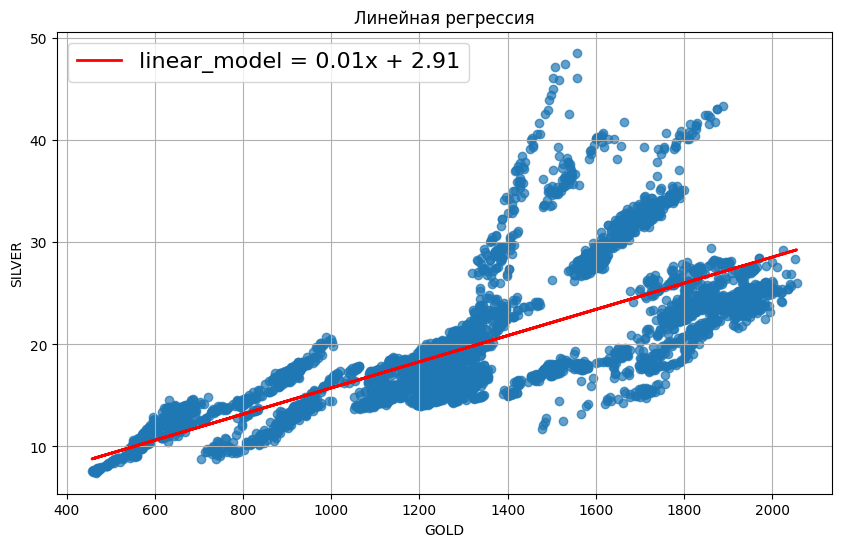

In [105]:
import matplotlib.pyplot as plt

model_y_sk = model_a * X + model_b

fig = plt.figure(figsize=(10, 6))
plt.plot(X, model_y_sk, linewidth=2, color='r', label=f'linear_model = {model_a:.2f}x + {model_b:.2f}')
plt.scatter(X, y, alpha=0.7)
plt.grid()
plt.xlabel('GOLD')
plt.ylabel('SILVER')
plt.legend(prop={'size': 16})
plt.title('Линейная регрессия')
plt.show()

In [106]:
from sklearn.metrics import mean_squared_error

mean_squared_error(model_y_sk, y)

20.846811204120808

Среднее квадратичное составило 20.846811204120808.
Чем меньше значение MSE, тем лучше. Это свидетельствует о том, что модель лучше приближает фактические данные.

3.  Загрузить данные: 'insurance.csv'. Вывести и провести предобработку. 
Вывести список уникальных регионов.
3.1. Выполнить однофакторный ANOVA тест, чтобы проверить влияние 
региона на индекс массы тела (BMI), используя первый способ, 
через библиотеку Scipy. 
3.2. Выполнить однофакторный ANOVA тест, чтобы проверить влияние 
региона на индекс массы тела (BMI), используя второй способ, с 
помощью функции anova_lm() из библиотеки statsmodels. 
3.3. С помощью t критерия Стьюдента перебрать все пары. Определить 
поправку Бонферрони. Сделать выводы. 
3.4. Выполнить пост-хок тесты Тьюки и построить график. 
3.5. Выполнить двухфакторный ANOVA тест, чтобы проверить влияние 
региона и пола на индекс массы тела (BMI), используя функцию 
anova_lm() из библиотеки statsmodels. 
3.6. Выполнить пост-хок тесты Тьюки и построить график.

In [22]:
import pandas as pd

data=pd.read_csv('insurance.csv',  sep=",")
print(data)
print(data.isnull().sum())
regions = data['region'].unique()
print("Уникальные регионы:", regions)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Уникальные регионы: ['southwest' 'southeast' 'northwest' 'no

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts

regions

region_anova=np.random.choice(a=regions, p=[0.25, 0.25, 0.25, 0.25], size=1000)
bmi=sts.poisson.rvs(loc=15, mu=25, size=1000)

frame = pd.DataFrame({"region": region_anova, "bmi": bmi})
groups=frame.groupby("region").groups

groups = frame.groupby("region")["bmi"].apply(list)

print(frame.head())

for region, group in groups.items():
    print(f"{region}: {len(group)} элементов")

f_statistic, p_value = sts.f_oneway(*groups)
print(f"F-статистика: {f_statistic}, P-значение: {p_value}")


      region  bmi
0  southeast   40
1  northwest   39
2  northeast   44
3  northeast   36
4  northwest   45
northeast: 247 элементов
northwest: 236 элементов
southeast: 250 элементов
southwest: 267 элементов
F-статистика: 1.602447477864852, P-значение: 0.18718583285078633


Нулевая  гипотеза  H0 утверждает,  что  все  a классов  градации  имеют одинаковые значения средних: μ1 = μ2 = ... = μa.
Альтернативная гипотеза H1: не все классы градации имеют одно значение 
средних.

Чем больше F-статистика, тем больше вариация между выборочными средними по сравнению с вариациями внутри выборок.
Если p-значение меньше α = 0,05, то можно отвергнуть нулевую гипотезу дисперсионного анализа и сделать вывод о наличии статистически значимой разницы между средними значениями групп.

В моем случае P-значение: 0.18718583285078633>0.5 нельзя отвергать нулевую гипотезу.

Дисперсия – характеристика  рассеивания  данных  вокруг  их  среднего 
значения.  
Дисперсионный  анализ  (ANOVA)  – статистическая  процедура, 
используемая для сравнения средних значений определенной переменной в 
двух и более независимых группах. 

In [68]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = pd.read_csv('insurance.csv', sep=",")

model = ols('bmi ~ region', data=data).fit()
anova_rez = sm.stats.anova_lm(model, typ=2)
print(anova_rez)

                sum_sq      df          F        PR(>F)
region     4055.880631     3.0  39.495057  1.881839e-24
Residual  45664.319755  1334.0        NaN           NaN


In [71]:
import pandas as pd
import itertools
from scipy import stats

results = {}

for region1, region2 in itertools.combinations(regions, 2):
    group1 = data[data['region'] == region1]['bmi']
    group2 = data[data['region'] == region2]['bmi']
    t_stat, p_value = stats.ttest_ind(group1, group2)
    results[(region1, region2)] = {'t_stat': t_stat, 'p_value': p_value}


alpha = 0.05 
num_tests = len(results)
bonferroni_alpha = alpha / num_tests

print(f"Используя уровень значимости {alpha}, после поправки Бонферрони новый уровень: {bonferroni_alpha}\n")

for (region1, region2), result in results.items():
    t_stat = result['t_stat']
    p_value = result['p_value']
    significant = p_value < bonferroni_alpha
    print(f"Сравнение {region1} и {region2}:")
    print(f"  t-статистика: {t_stat:.4f}, p-значение: {p_value:.4f}, Значимо: {significant}\n")

if significant:
    print("На основе поправки Бонферрони, существуют значимые различия между парами регионов.")
else:
    print("На основе поправки Бонферрони, нет значимых различий между парами регионов.")

Используя уровень значимости 0.05, после поправки Бонферрони новый уровень: 0.008333333333333333

Сравнение southwest и southeast:
  t-статистика: -5.9084, p-значение: 0.0000, Значимо: True

Сравнение southwest и northwest:
  t-статистика: 3.2844, p-значение: 0.0011, Значимо: True

Сравнение southwest и northeast:
  t-статистика: 3.1169, p-значение: 0.0019, Значимо: True

Сравнение southeast и northwest:
  t-статистика: 9.2565, p-значение: 0.0000, Значимо: True

Сравнение southeast и northeast:
  t-статистика: 8.7909, p-значение: 0.0000, Значимо: True

Сравнение northwest и northeast:
  t-статистика: 0.0603, p-значение: 0.9519, Значимо: False

На основе поправки Бонферрони, нет значимых различий между парами регионов.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
northeast northwest   0.0263 0.9999 -1.1552  1.2078  False
northeast southeast   4.1825    0.0   3.033   5.332   True
northeast southwest   1.4231 0.0107  0.2416  2.6046   True
northwest southeast   4.1562    0.0  3.0077  5.3047   True
northwest southwest   1.3968 0.0127  0.2162  2.5774   True
southeast southwest  -2.7594    0.0 -3.9079 -1.6108   True
----------------------------------------------------------


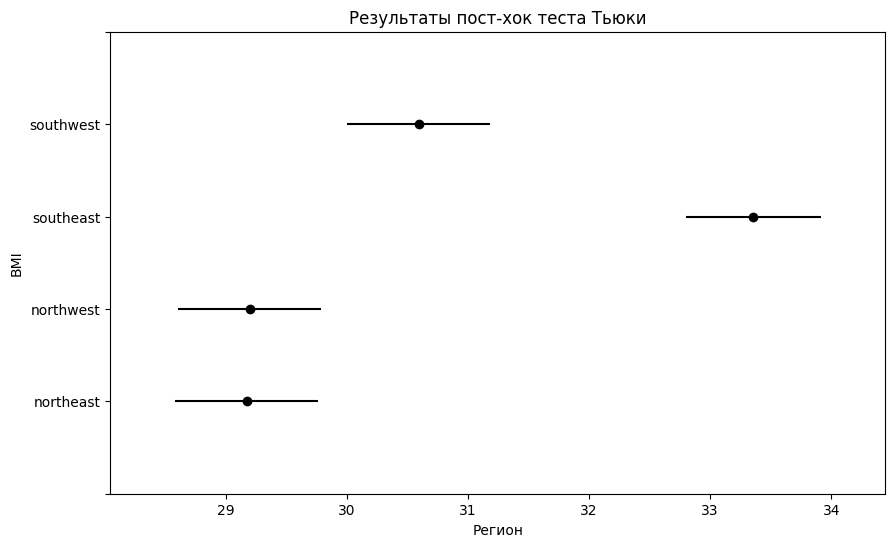

In [78]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

data = pd.read_csv('insurance.csv', sep=",")

tukey_results = pairwise_tukeyhsd(endog=data['bmi'], groups=data['region'], alpha=0.05)

print(tukey_results)

tukey_results.plot_simultaneous(ylabel='BMI', xlabel='Регион')
plt.title('Результаты пост-хок теста Тьюки')
plt.show()


Доверительные интервалы не перекрываются, это значит, что различия между регионами значительные, не считая northwest-northeast

In [82]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = pd.read_csv('insurance.csv', sep=",")

data['region'] = data['region'].astype('category')
data['sex'] = data['sex'].astype('category')

model = ols('bmi ~ C(region) + C(sex) + C(region):C(sex)', data=data).fit()

anova_results = sm.stats.anova_lm(model, typ=2)

print(anova_results)

for factor in anova_results.index:
    p_value = anova_results.loc[factor, 'PR(>F)']
    print(f'p-значение для {factor}: {p_value:.4f}')


                        sum_sq      df          F        PR(>F)
C(region)          4034.975135     3.0  39.398134  2.163195e-24
C(sex)               86.007035     1.0   2.519359  1.126940e-01
C(region):C(sex)    174.157808     3.0   1.700504  1.650655e-01
Residual          45404.154911  1330.0        NaN           NaN
p-значение для C(region): 0.0000
p-значение для C(sex): 0.1127
p-значение для C(region):C(sex): 0.1651
p-значение для Residual: nan


p-значение для C(region): 0.0000
p-значение для C(sex): 0.1127
p-значение для C(region):C(sex): 0.1651
Поскольку p-значения для региона меньше 0,05, это означает, что оба фактора оказывают статистически значимое влияние на bmi.
А поскольку p-значение для эффекта взаимодействия (0.1651) составляет не менее  0,05,  это  говорит  нам  об  отсутствии  значительного  эффекта взаимодействия между воздействием полом и регионом, пол аналогично не влияет на значение массы тела.

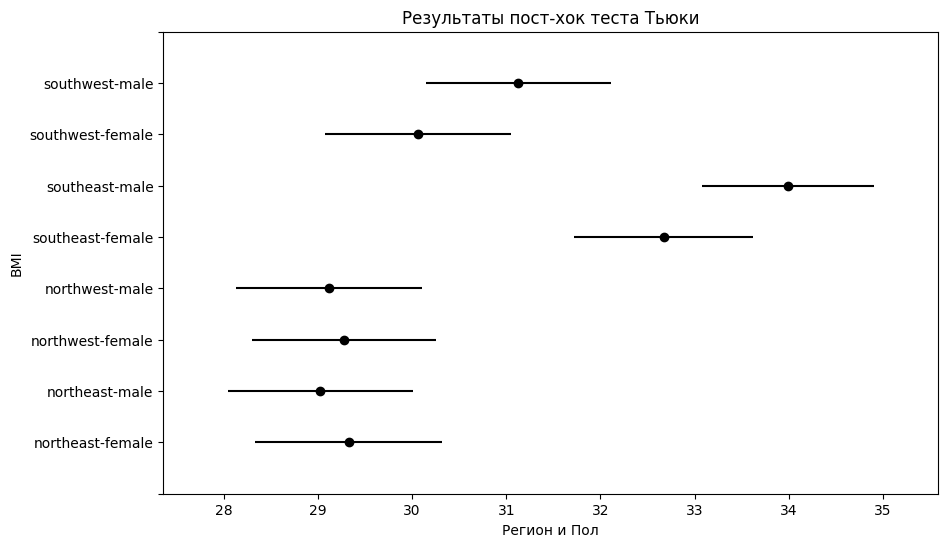

In [94]:
data['region_sex'] = data['region'].astype(str) + '-' + data['sex'].astype(str)


tukey_results = pairwise_tukeyhsd(endog=data['bmi'], groups=data['region_sex'], alpha=0.05)

fig, ax = plt.subplots(figsize=(10, 6))
tukey_results.plot_simultaneous(ax=ax, ylabel='BMI', xlabel='Регион и Пол')
plt.title('Результаты пост-хок теста Тьюки')
plt.show()